# Trending Videos Case Study

In [1]:
# imports 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt 

%autosave 150
%matplotlib inline
plt.style.use('ggplot')

Autosaving every 150 seconds


In [2]:
# read in data
df = pd.read_csv('data/USvideos.csv')

#####  Data Analysis

In [3]:
df.shape

(40949, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [5]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [6]:
sorted(df.category_id.unique())

[1, 2, 10, 15, 17, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 43]

In [19]:
df[['trending_date', 'publish_time']]

,trending_date,publish_time
0,17.14.11,2017-11-13T17:13:01.000Z
1,17.14.11,2017-11-13T07:30:00.000Z
2,17.14.11,2017-11-12T19:05:24.000Z
3,17.14.11,2017-11-13T11:00:04.000Z
4,17.14.11,2017-11-12T18:01:41.000Z
...,...,...
40944,18.14.06,2018-05-18T13:00:04.000Z
40945,18.14.06,2018-05-18T01:00:06.000Z
40946,18.14.06,2018-05-18T17:34:22.000Z
40947,18.14.06,2018-05-17T17:00:04.000Z


In [8]:
df['likes/dislikes ratio'] = df['likes'] / df['dislikes']
df['percent likes'] = df['likes'] / (df['likes'] + df['dislikes'])
df['percent dislikes'] = df['dislikes'] / (df['likes'] + df['dislikes'])

In [9]:
df['percent likes'].head()

0    0.950970
1    0.940521
2    0.964729
3    0.938550
4    0.985181
Name: percent likes, dtype: float64

In [10]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,likes/dislikes ratio,percent likes,percent dislikes
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,19.395482,0.950970,0.049030
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",15.812724,0.940521,0.059479
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,27.352126,0.964729,0.035271
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,15.273273,0.938550,0.061450
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,66.483157,0.985181,0.014819


In [11]:
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%Y%m%d')  # df.dt.is_year_start

array([[<AxesSubplot:xlabel='category_id', ylabel='category_id'>,
        <AxesSubplot:xlabel='views', ylabel='category_id'>,
        <AxesSubplot:xlabel='likes', ylabel='category_id'>,
        <AxesSubplot:xlabel='dislikes', ylabel='category_id'>,
        <AxesSubplot:xlabel='comment_count', ylabel='category_id'>],
       [<AxesSubplot:xlabel='category_id', ylabel='views'>,
        <AxesSubplot:xlabel='views', ylabel='views'>,
        <AxesSubplot:xlabel='likes', ylabel='views'>,
        <AxesSubplot:xlabel='dislikes', ylabel='views'>,
        <AxesSubplot:xlabel='comment_count', ylabel='views'>],
       [<AxesSubplot:xlabel='category_id', ylabel='likes'>,
        <AxesSubplot:xlabel='views', ylabel='likes'>,
        <AxesSubplot:xlabel='likes', ylabel='likes'>,
        <AxesSubplot:xlabel='dislikes', ylabel='likes'>,
        <AxesSubplot:xlabel='comment_count', ylabel='likes'>],
       [<AxesSubplot:xlabel='category_id', ylabel='dislikes'>,
        <AxesSubplot:xlabel='views', ylabel

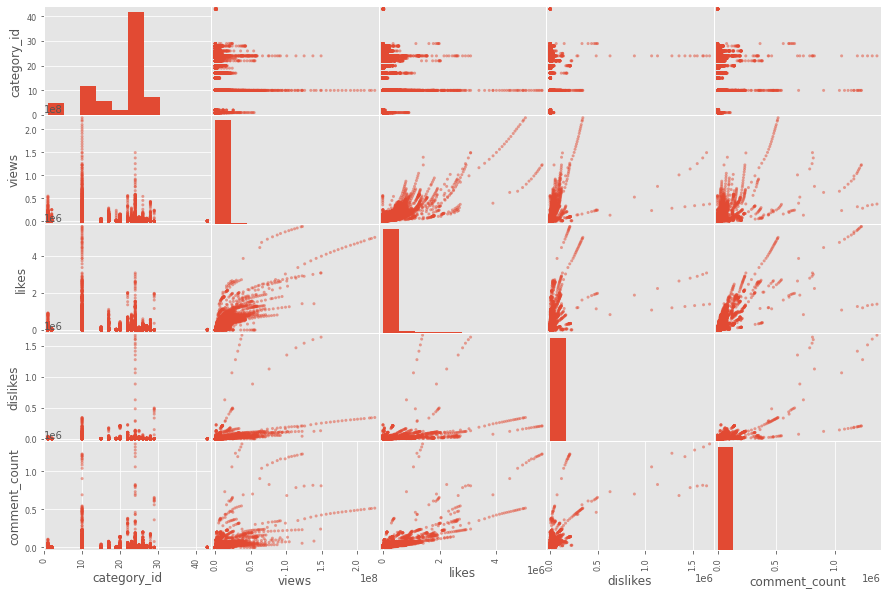

In [12]:
pd.plotting.scatter_matrix(df[['trending_date', 'category_id', 'views', 'likes', 'dislikes', 'comment_count']], figsize=(15, 10))

In [13]:
# Danny Deleon's dictionary per category
category_dict = {2 :'Autos & Vehicles',1 :'Film & Animation',10 : 'Music',15 : 'Pets & Animals'
                ,17 : 'Sports',18 : 'Short Movies',19 : 'Travel & Events',20 : 'Gaming'
                ,21 : 'Videoblogging',22 : 'People & Blogs',23 : 'Comedy',24 : 'Entertainment'
                ,25 : 'News & Politics',26 : 'How to & Style',27 : 'Education',28 : 'Science & Technology'
                ,29 : 'Nonprofits & Activism',30 : 'Movies',31 : 'Anime/Animation',32 : 'Action/Adventure'
                ,33 : 'Classics',34 : 'Comedy',35 : 'Documentary',36 : 'Drama',37 : 'Family'
                ,38 : 'Foreign',39 : 'Horror',40 : 'Sci-Fi/Fantasy',41 : 'Thriller',42 : 'Shorts'
                ,43 : 'Shows',44 : 'Trailers'}
# category_dict